## Problem Statement

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score


import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("day.csv")

In [3]:
data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [4]:
data.shape

(730, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
data.drop(['instant'],axis=1,inplace=True)

In [8]:
data.drop(['dteday'],axis=1,inplace=True)

In [9]:
num_variables=['mnth','weekday','temp','atemp','hum','windspeed','casual','registered','cnt']
cat_variables=['season','holiday','workingday','weathersit']

### Visualising data to see if there are any patterns

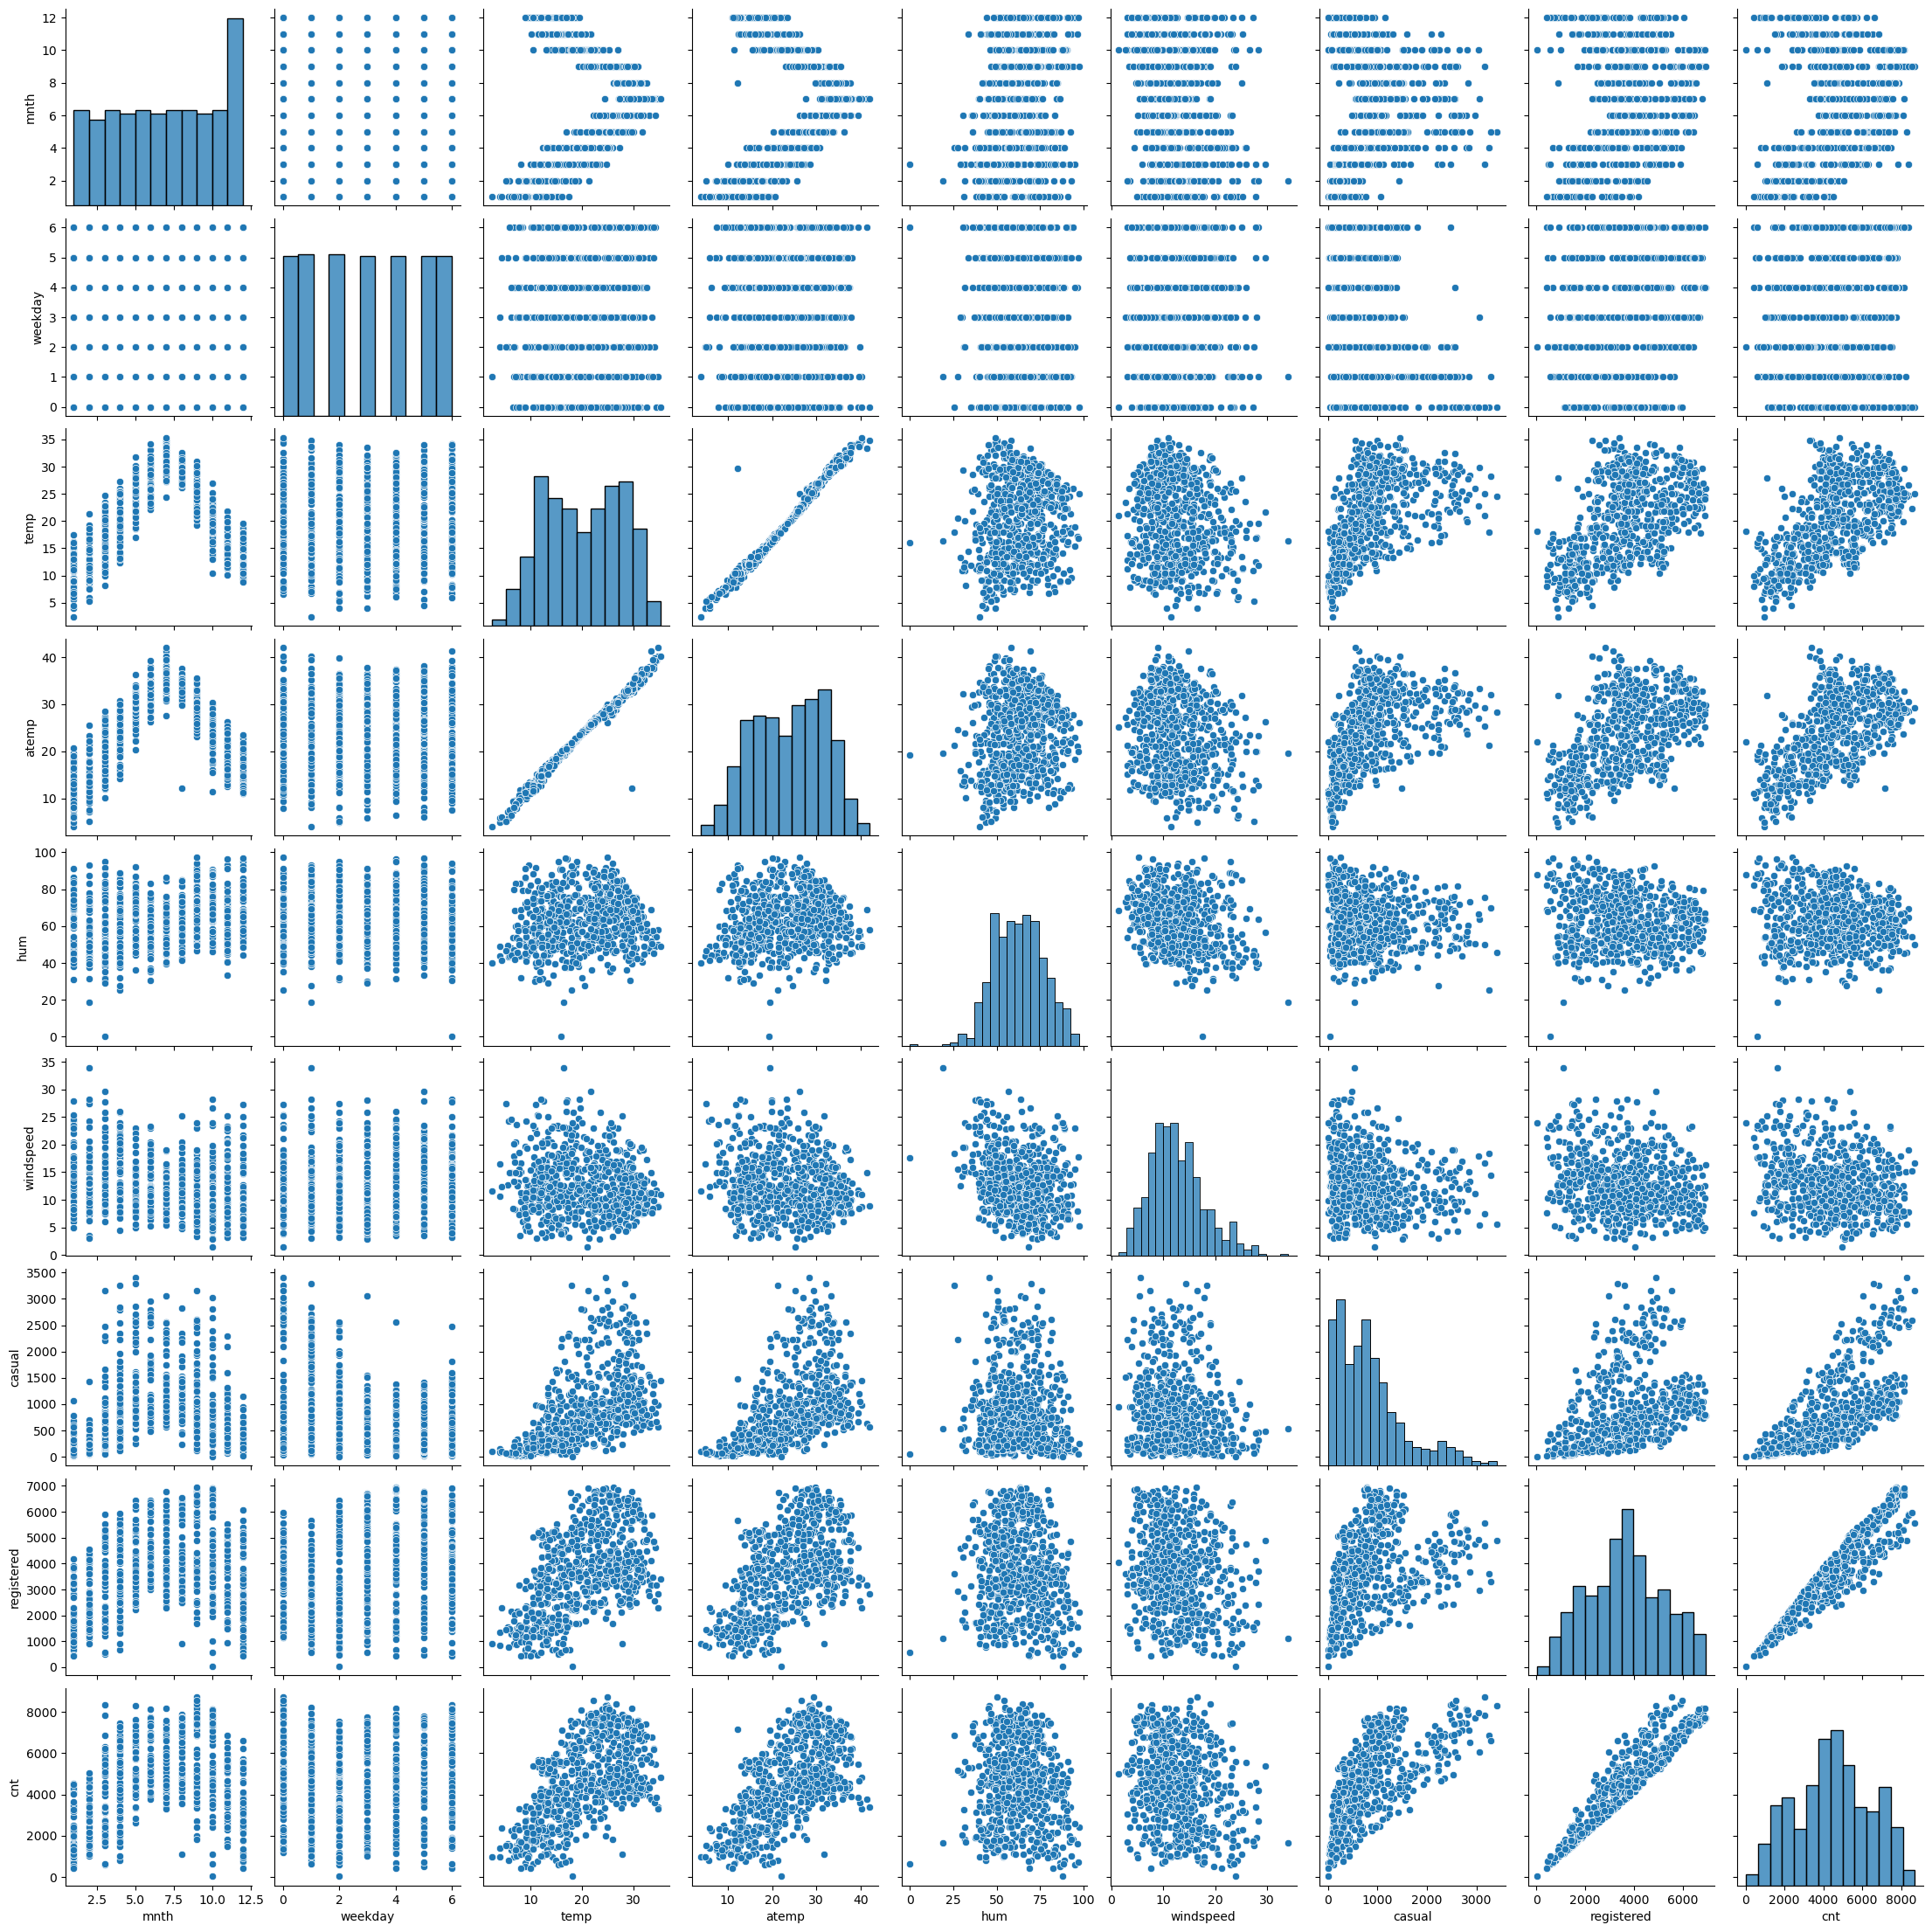

In [10]:
sns.pairplot(data[num_variables])
plt.show()

There is some linear relationship of variables temp, atemp with cnt. Will analyse further.

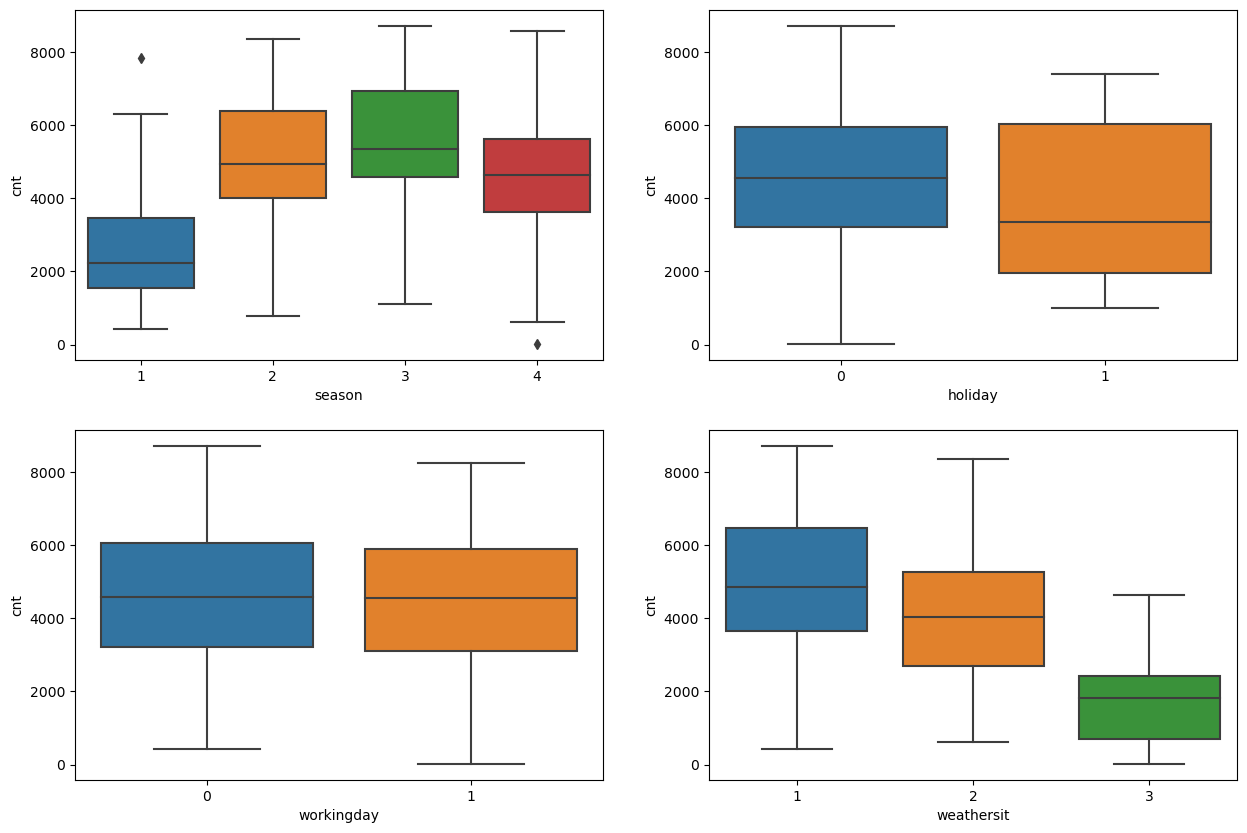

In [11]:
#Visualising Categorical variables
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(2,2,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(2,2,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(2,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.show()

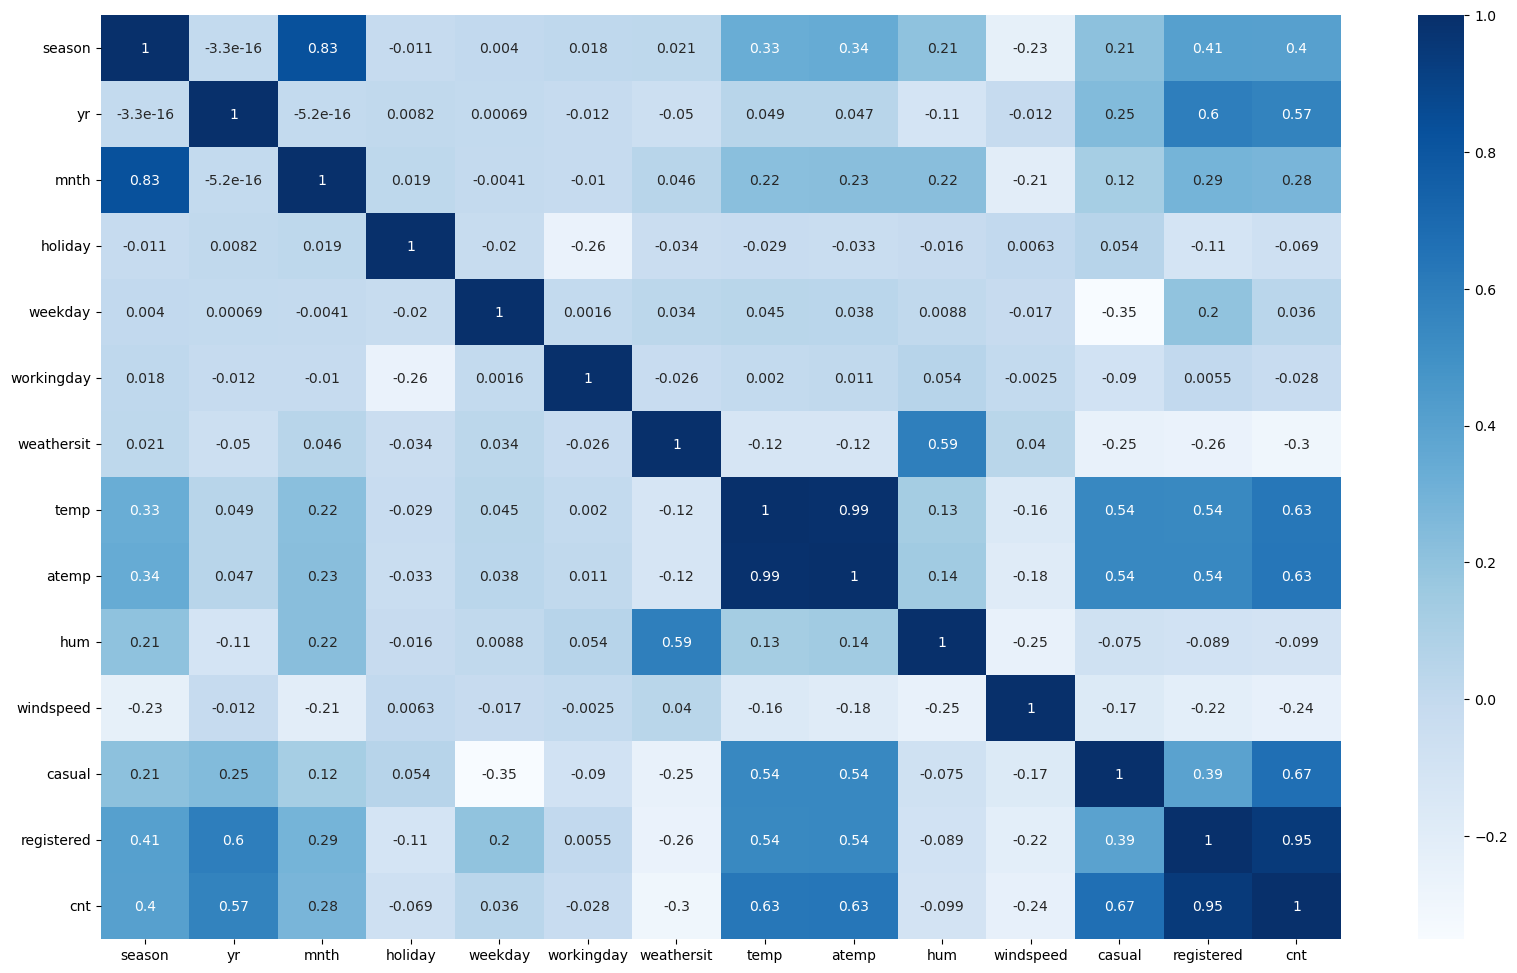

In [12]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.show()

There is a high count in summer season, holiday and during clear weather

### Dummy variable creation

In [575]:
#Mapping weather and season 
data.weathersit=data.weathersit.map({1:'clear',2:'mist',3:'snow'})
data.season=data.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [576]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [577]:

weather=pd.get_dummies(data['weathersit'],drop_first=True)
seas=pd.get_dummies(data['season'],drop_first=True)
data=pd.concat([data,weather,seas],axis=1)

In [578]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,mist,snow,spring,summer,winter
0,spring,0,1,0,1,1,mist,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,1,0,0
1,spring,0,1,0,2,1,mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,1,0,0
2,spring,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1,0,0
3,spring,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1,0,0
4,spring,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1,0,0


Dropping season and weathersit as dummy variables are created

In [579]:
data.drop(['season'],axis=1,inplace=True)

In [580]:
data.drop(['weathersit'],axis=1,inplace=True)

### Train Test split and Rescaling the values

In [581]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [582]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train[num_variables] = scaler.fit_transform(df_train[num_variables])

In [583]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,mist,snow,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.504456,0.025490,0.491830,0.711765,0.537262,0.512989,0.650369,0.320768,0.254661,0.523944,0.513620,0.343137,0.029412,0.243137,0.245098,0.24902
std,0.500429,0.315338,0.157763,0.329528,0.453386,0.225844,0.212385,0.145882,0.169797,0.206011,0.228175,0.224593,0.475223,0.169124,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.540519,0.526811,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710,1.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


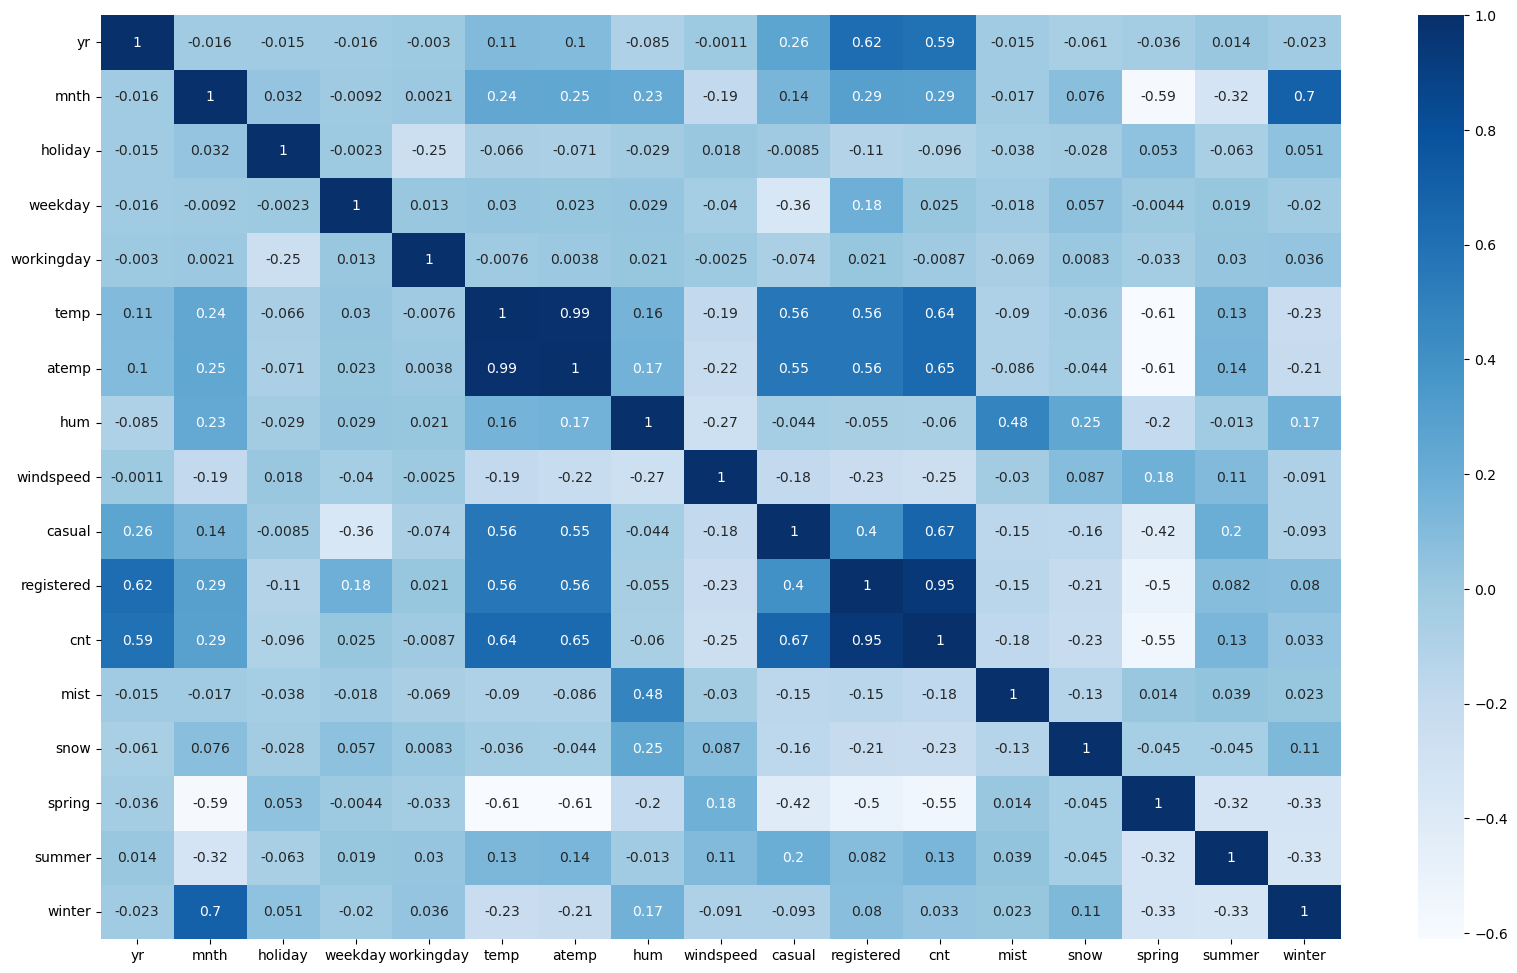

In [584]:
plt.figure(figsize=(20,12))
sns.heatmap(df_train.corr(),annot=True,cmap='Blues')
plt.show()

There is a good correlation of temp, atemp, windspeed, hum. There might exist a collinearity between registered, casual and cnt as registered+casual=cnt

In [585]:
y_train = df_train.pop('cnt')
X_train = df_train

### Model Building

In [586]:
#temp has a good linear relationship with cnt
X_train_lm = sm.add_constant(X_train[['temp']])

lireg = sm.OLS(y_train, X_train_lm).fit()

In [587]:
lireg.params

const    0.169798
temp     0.639952
dtype: float64

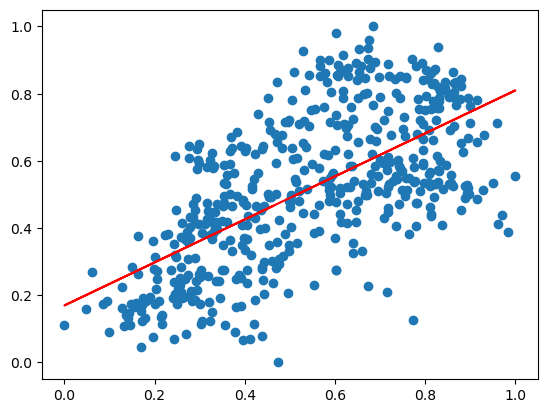

In [588]:
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.169798 + 0.639952*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [589]:
lireg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           5.80e-61
Time:                        22:16:56   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.000       0.131       0.208
temp           0.6400      0.034     18.949      0.000       0.574       0.706
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Good R-squared and P is significant, hence proceeding to add other variable

In [590]:
X_train_lm = sm.add_constant(X_train[['temp','atemp']])

lireg = sm.OLS(y_train, X_train_lm).fit()

In [591]:
lireg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.5
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.95e-60
Time:                        22:16:56   Log-Likelihood:                 176.81
No. Observations:                 510   AIC:                            -347.6
Df Residuals:                     507   BIC:                            -334.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1634      0.020      8.215      0.000       0.124       0.202
temp           0.1818      0.233      0.779      0.436      -0.277       0.640
atemp          0.4923      0.248      1.984      0.048       0.005       0.980
==============================================================================
Omnibus:                        4.934   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                3.720
Skew:                           0.079   Prob(JB):                        0.156
Kurtosis:                       2.612   Cond. No.                         56.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P is insignificant, This indicates strong collinearity

In [592]:
X_train_lm = sm.add_constant(X_train[['temp','yr']])

lireg = sm.OLS(y_train, X_train_lm).fit()

In [593]:
lireg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          9.25e-130
Time:                        22:16:56   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.000       0.050       0.109
temp           0.5836      0.025     23.604      0.000       0.535       0.632
yr             0.2372      0.011     21.261      0.000       0.215       0.259
==============================================================================
Omnibus:                       31.402   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.724
Skew:                          -0.503   Prob(JB):                     5.28e-10
Kurtosis:                       4.000   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared has increased and P is significant

In [594]:
X_train_lm = sm.add_constant(X_train[['temp','yr','spring']])

lireg = sm.OLS(y_train, X_train_lm).fit()

In [595]:
lireg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     475.6
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          8.50e-147
Time:                        22:16:56   Log-Likelihood:                 380.27
No. Observations:                 510   AIC:                            -752.5
Df Residuals:                     506   BIC:                            -735.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2025      0.019     10.795      0.000       0.166       0.239
temp           0.4167      0.029     14.570      0.000       0.361       0.473
yr             0.2408      0.010     23.437      0.000       0.221       0.261
spring        -0.1441      0.015     -9.627      0.000      -0.173      -0.115
==============================================================================
Omnibus:                      101.940   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.940
Skew:                          -0.976   Prob(JB):                     1.20e-60
Kurtosis:                       6.029   Cond. No.                         8.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared has increased and P is significant

In [596]:
X_train_lm = sm.add_constant(X_train[['temp','yr','spring','windspeed']])

lireg = sm.OLS(y_train, X_train_lm).fit()

In [597]:
lireg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     388.0
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          1.86e-152
Time:                        22:16:57   Log-Likelihood:                 396.65
No. Observations:                 510   AIC:                            -783.3
Df Residuals:                     505   BIC:                            -762.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2643      0.021     12.534      0.000       0.223       0.306
temp           0.4005      0.028     14.371      0.000       0.346       0.455
yr             0.2417      0.010     24.270      0.000       0.222       0.261
spring        -0.1369      0.015     -9.401      0.000      -0.165      -0.108
windspeed     -0.1725      0.030     -5.789      0.000      -0.231      -0.114
==============================================================================
Omnibus:                       84.617   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.749
Skew:                          -0.865   Prob(JB):                     1.15e-43
Kurtosis:                       5.512   Cond. No.                         9.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared has increased and P is significant

### Adding all variables to train the model

In [598]:
X_train_lm = sm.add_constant(X_train)

lr_all = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

lr_all.params

const         1.228184e-15
yr            3.660267e-16
mnth          6.938894e-17
holiday      -4.440892e-16
weekday       9.159340e-16
workingday    4.649059e-16
temp         -8.881784e-16
atemp         1.221245e-15
hum           2.498002e-16
windspeed     2.081668e-16
casual        3.774735e-01
registered    7.968247e-01
mist          4.926615e-16
snow         -6.245005e-17
spring       -4.718448e-16
summer       -6.938894e-17
winter       -1.318390e-16
dtype: float64

In [599]:
lr_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.925e+29
Date:                Sun, 08 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:16:57   Log-Likelihood:                 16359.
No. Observations:                 510   AIC:                        -3.268e+04
Df Residuals:                     493   BIC:                        -3.261e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.228e-15   1.25e-15      0.982      0.327   -1.23e-15    3.69e-15
yr           3.66e-16   4.22e-16      0.866      0.387   -4.64e-16     1.2e-15
mnth        6.939e-17   8.02e-16      0.087      0.931   -1.51e-15    1.64e-15
holiday    -4.441e-16   8.62e-16     -0.515      0.607   -2.14e-15    1.25e-15
weekday     9.159e-16   4.71e-16      1.944      0.052   -9.68e-18    1.84e-15
workingday  4.649e-16   2.97e-16      1.564      0.118   -1.19e-16    1.05e-15
temp       -8.882e-16   4.38e-15     -0.203      0.840    -9.5e-15    7.72e-15
atemp       1.221e-15   4.43e-15      0.276      0.783   -7.48e-15    9.92e-15
hum         2.498e-16   1.22e-15      0.204      0.838   -2.15e-15    2.65e-15
windspeed   2.082e-16   8.77e-16      0.237      0.812   -1.51e-15    1.93e-15
casual         0.3775   9.41e-16   4.01e+14      0.000       0.377       0.377
registered     0.7968   1.25e-15   6.36e+14      0.000       0.797       0.797
mist        4.927e-16   3.48e-16      1.416      0.157   -1.91e-16    1.18e-15
snow       -6.245e-17   9.14e-16     -0.068      0.946   -1.86e-15    1.73e-15
spring     -4.718e-16   7.26e-16     -0.650      0.516    -1.9e-15    9.54e-16
summer     -6.939e-17   4.95e-16     -0.140      0.888   -1.04e-15    9.02e-16
winter     -1.318e-16    5.9e-16     -0.223      0.823   -1.29e-15    1.03e-15
==============================================================================
Omnibus:                       30.391   Durbin-Watson:                   0.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.700
Skew:                           0.639   Prob(JB):                     2.92e-08
Kurtosis:                       3.031   Cond. No.                         97.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Not significant looking at P values

### Calculating VIF to eliminate columns if VIF>5

In [600]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,394.94
6,atemp,369.11
7,hum,31.14
10,registered,28.94
1,mnth,12.59
9,casual,5.63
0,yr,5.37
8,windspeed,5.21
15,winter,5.08
3,weekday,4.71


VIF should be less than 5, Hence dropping one after other

In [601]:
X = X_train.drop('atemp', 1,)

In [602]:
X_train_lm = sm.add_constant(X)

lr_1stdrop = sm.OLS(y_train, X_train_lm).fit()

In [603]:
lr_1stdrop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.786e+31
Date:                Sun, 08 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:16:57   Log-Likelihood:                 17689.
No. Observations:                 510   AIC:                        -3.535e+04
Df Residuals:                     494   BIC:                        -3.528e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.359e-16   9.21e-17     -2.562      0.011   -4.17e-16    -5.5e-17
yr          7.286e-17   3.11e-17      2.343      0.020    1.18e-17    1.34e-16
mnth        6.245e-17    5.9e-17      1.058      0.291   -5.35e-17    1.78e-16
holiday    -3.053e-16   6.35e-17     -4.809      0.000    -4.3e-16   -1.81e-16
weekday    -1.388e-17   3.46e-17     -0.401      0.688   -8.18e-17    5.41e-17
workingday  -2.29e-16   2.19e-17    -10.479      0.000   -2.72e-16   -1.86e-16
temp        1.665e-16   9.33e-17      1.784      0.075   -1.68e-17     3.5e-16
hum         1.665e-16      9e-17      1.850      0.065   -1.03e-17    3.43e-16
windspeed   8.327e-17   6.35e-17      1.312      0.190   -4.14e-17    2.08e-16
casual         0.3775   6.93e-17   5.45e+15      0.000       0.377       0.377
registered     0.7968   9.23e-17   8.64e+15      0.000       0.797       0.797
mist        6.418e-17   2.56e-17      2.506      0.013    1.39e-17    1.15e-16
snow        7.633e-17   6.73e-17      1.135      0.257   -5.58e-17    2.08e-16
spring      1.527e-16   5.31e-17      2.875      0.004    4.83e-17    2.57e-16
summer      1.943e-16   3.59e-17      5.416      0.000    1.24e-16    2.65e-16
winter     -1.943e-16   4.29e-17     -4.530      0.000   -2.79e-16    -1.1e-16
==============================================================================
Omnibus:                        4.480   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                3.541
Skew:                           0.090   Prob(JB):                        0.170
Kurtosis:                       2.634   Cond. No.                         26.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [604]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,31.12
6,hum,31.10
9,registered,28.90
1,mnth,12.59
8,casual,5.62
0,yr,5.37
7,windspeed,4.97
14,winter,4.95
3,weekday,4.68
12,spring,4.40


Dropping registered as it has high collinearity with cnt

In [605]:
X = X.drop('registered', 1)

In [606]:
X.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,casual,mist,snow,spring,summer,winter
653,1,0.818182,0,0.500000,1,0.509887,0.575354,0.300794,0.280402,0,0,0,0,1
576,1,0.545455,0,0.500000,1,0.815169,0.725633,0.264686,0.294422,0,0,0,0,0
426,1,0.181818,0,0.000000,0,0.442393,0.640189,0.255342,0.290765,1,0,1,0,0
728,1,1.000000,0,0.166667,1,0.245101,0.498067,0.663106,0.110332,0,0,1,0,0
482,1,0.272727,0,0.000000,0,0.395666,0.504508,0.188475,0.340750,1,0,0,1,0


In [607]:
X_train_lm = sm.add_constant(X)

lr_2nddrop = sm.OLS(y_train, X_train_lm).fit()
lr_2nddrop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     233.8
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          1.01e-207
Time:                        22:16:57   Log-Likelihood:                 556.09
No. Observations:                 510   AIC:                            -1082.
Df Residuals:                     495   BIC:                            -1019.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2221      0.034      6.469      0.000       0.155       0.290
yr             0.2068      0.008     26.843      0.000       0.192       0.222
mnth           0.0178      0.023      0.778      0.437      -0.027       0.063
holiday       -0.1056      0.024     -4.365      0.000      -0.153      -0.058
weekday        0.0928      0.013      7.274      0.000       0.068       0.118
workingday    -0.0083      0.008     -0.982      0.327      -0.025       0.008
temp           0.3377      0.033     10.263      0.000       0.273       0.402
hum           -0.1032      0.035     -2.981      0.003      -0.171      -0.035
windspeed     -0.1308      0.024     -5.469      0.000      -0.178      -0.084
casual         0.3256      0.027     12.154      0.000       0.273       0.378
mist          -0.0405      0.010     -4.146      0.000      -0.060      -0.021
snow          -0.2066      0.024     -8.467      0.000      -0.255      -0.159
spring        -0.0675      0.020     -3.312      0.001      -0.108      -0.027
summer         0.0190      0.014      1.363      0.173      -0.008       0.046
winter         0.0684      0.016      4.183      0.000       0.036       0.101
==============================================================================
Omnibus:                       72.612   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.981
Skew:                          -0.839   Prob(JB):                     1.33e-29
Kurtosis:                       4.855   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [608]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,hum,31.10
5,temp,22.39
1,mnth,12.37
8,casual,5.61
7,windspeed,4.87
13,winter,4.62
11,spring,4.39
3,weekday,4.10
4,workingday,3.70
12,summer,2.82


Dropping hum attribute as it has high VIF

In [609]:
X = X.drop('hum', 1)

In [610]:
X_train_lm = sm.add_constant(X)

lr_3rddrop = sm.OLS(y_train, X_train_lm).fit()
lr_3rddrop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     247.1
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          5.07e-207
Time:                        22:16:57   Log-Likelihood:                 551.55
No. Observations:                 510   AIC:                            -1075.
Df Residuals:                     496   BIC:                            -1016.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1740      0.031      5.697      0.000       0.114       0.234
yr             0.2086      0.008     26.962      0.000       0.193       0.224
mnth           0.0115      0.023      0.501      0.616      -0.034       0.057
holiday       -0.1077      0.024     -4.420      0.000      -0.156      -0.060
weekday        0.0941      0.013      7.321      0.000       0.069       0.119
workingday    -0.0100      0.009     -1.174      0.241      -0.027       0.007
temp           0.3135      0.032      9.754      0.000       0.250       0.377
windspeed     -0.1092      0.023     -4.753      0.000      -0.154      -0.064
casual         0.3317      0.027     12.321      0.000       0.279       0.385
mist          -0.0571      0.008     -7.049      0.000      -0.073      -0.041
snow          -0.2345      0.023    -10.326      0.000      -0.279      -0.190
spring        -0.0757      0.020     -3.718      0.000      -0.116      -0.036
summer         0.0131      0.014      0.946      0.345      -0.014       0.040
winter         0.0611      0.016      3.745      0.000       0.029       0.093
==============================================================================
Omnibus:                       70.822   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.621
Skew:                          -0.824   Prob(JB):                     1.18e-28
Kurtosis:                       4.826   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [611]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,15.27
1,mnth,11.28
7,casual,5.61
6,windspeed,4.75
12,winter,4.13
3,weekday,4.08
4,workingday,3.59
10,spring,2.53
11,summer,2.25
0,yr,2.24


Dropping mnth column

In [612]:
X = X.drop('mnth', 1)

In [613]:
X_train_lm = sm.add_constant(X)

lr_4thdrop = sm.OLS(y_train, X_train_lm).fit()
lr_4thdrop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     268.1
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          3.44e-208
Time:                        22:16:57   Log-Likelihood:                 551.42
No. Observations:                 510   AIC:                            -1077.
Df Residuals:                     497   BIC:                            -1022.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1806      0.028      6.535      0.000       0.126       0.235
yr             0.2084      0.008     26.990      0.000       0.193       0.224
holiday       -0.1073      0.024     -4.410      0.000      -0.155      -0.060
weekday        0.0941      0.013      7.325      0.000       0.069       0.119
workingday    -0.0101      0.009     -1.190      0.234      -0.027       0.007
temp           0.3146      0.032      9.816      0.000       0.252       0.378
windspeed     -0.1093      0.023     -4.760      0.000      -0.154      -0.064
casual         0.3315      0.027     12.324      0.000       0.279       0.384
mist          -0.0571      0.008     -7.057      0.000      -0.073      -0.041
snow          -0.2348      0.023    -10.349      0.000      -0.279      -0.190
spring        -0.0803      0.018     -4.409      0.000      -0.116      -0.044
summer         0.0100      0.012      0.808      0.420      -0.014       0.034
winter         0.0646      0.015      4.386      0.000       0.036       0.093
==============================================================================
Omnibus:                       70.560   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.741
Skew:                          -0.820   Prob(JB):                     1.11e-28
Kurtosis:                       4.836   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [614]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,11.67
6,casual,5.59
5,windspeed,4.68
2,weekday,4.04
3,workingday,3.57
9,spring,2.43
0,yr,2.23
10,summer,2.10
11,winter,2.02
7,mist,1.58


Dropping temp column

In [615]:
X = X.drop('temp', 1)

In [616]:
X_train_lm = sm.add_constant(X)

lr_5thdrop = sm.OLS(y_train, X_train_lm).fit()
lr_5thdrop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     238.1
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          2.49e-190
Time:                        22:16:57   Log-Likelihood:                 506.23
No. Observations:                 510   AIC:                            -988.5
Df Residuals:                     498   BIC:                            -937.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3811      0.020     18.765      0.000       0.341       0.421
yr             0.2082      0.008     24.697      0.000       0.192       0.225
holiday       -0.1121      0.027     -4.220      0.000      -0.164      -0.060
weekday        0.1209      0.014      8.822      0.000       0.094       0.148
workingday    -0.0076      0.009     -0.814      0.416      -0.026       0.011
windspeed     -0.1078      0.025     -4.301      0.000      -0.157      -0.059
casual         0.4313      0.027     15.869      0.000       0.378       0.485
mist          -0.0571      0.009     -6.465      0.000      -0.075      -0.040
snow          -0.2278      0.025     -9.202      0.000      -0.276      -0.179
spring        -0.2131      0.013    -16.039      0.000      -0.239      -0.187
summer        -0.0541      0.012     -4.687      0.000      -0.077      -0.031
winter        -0.0332      0.012     -2.806      0.005      -0.056      -0.010
==============================================================================
Omnibus:                       36.142   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.586
Skew:                          -0.558   Prob(JB):                     1.71e-11
Kurtosis:                       4.044   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [617]:
lr_5thdrop.params

const         0.381065
yr            0.208193
holiday      -0.112071
weekday       0.120885
workingday   -0.007562
windspeed    -0.107810
casual        0.431345
mist         -0.057137
snow         -0.227783
spring       -0.213122
summer       -0.054113
winter       -0.033206
dtype: float64

In [618]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,windspeed,4.11
3,workingday,3.19
2,weekday,2.66
5,casual,2.57
0,yr,2.23
8,spring,2.03
9,summer,1.95
10,winter,1.80
6,mist,1.49
1,holiday,1.10


VIF is less than 5 for all attributes. Hence, the model build with these attributes is significant.

### Residual Analysis

In [619]:
y_train_cnt = lr_5thdrop.predict(X_train_lm)

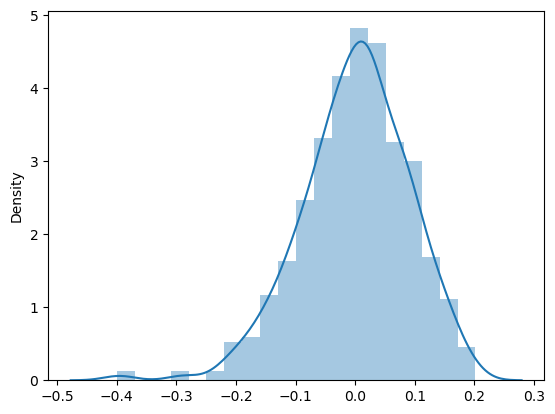

In [620]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
plt.show()

Can observe Normal distribution centered around 0, Hence the model is significant

### Making Predictions

In [621]:
df_test[num_variables] = scaler.transform(df_test[num_variables])

In [622]:
df_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,mist,snow,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.497717,0.036530,0.516743,0.639269,0.558941,0.532991,0.638508,0.313350,0.266372,0.527146,0.520592,0.319635,0.027397,0.255708,0.264840,0.232877
std,0.500722,0.311080,0.188034,0.343089,0.481313,0.233698,0.217888,0.148974,0.159947,0.217246,0.217921,0.218435,0.467403,0.163612,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.002133,0.059486,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.354650,0.344751,0.527265,0.198517,0.101951,0.359154,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.558691,0.549198,0.627737,0.299459,0.223712,0.526567,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.727273,0.000000,0.833333,1.000000,0.759096,0.714132,0.743928,0.403048,0.362085,0.664742,0.672745,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.038708,0.985273,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


In [623]:
y_test = df_test.pop('cnt')
X_test = df_test

In [624]:
X_test_final = sm.add_constant(X_test)
X_test_final = X_test_final.drop(["temp", "mnth", "hum","atemp","registered"], axis = 1)

In [625]:
y_pred = lr_5thdrop.predict(X_test_final)

In [626]:
mse = mean_squared_error(y_test, y_pred)
r_squared_test = r2_score(y_test, y_pred)


In [627]:
r_squared

0.8282771305599416

R-squared for training dataset is 0.840

R-squared for testing dataset is 0.828

cnt = 0.381065 + yr* 0.208193 + holiday*(-0.112071) + weekday*0.120885 + workingday*(-0.007562) + windspeed*(-0.107810) 
    + casual*0.431345 + mist*(-0.057137) + snow*(-0.227783) + spring*(-0.213122) + summer*(-0.054113) + winter*(-0.033206)

On weekday there are people who are opting to chose bike rides, So the company can increase more bikes during weekdays. 
There are more casual users which is why the count is increasing.